# Fraud Payment Logistic Regressiona

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

df = pd.read_csv("security_data/payment_fraud.csv")
df.sample(5)

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,label
8629,3,1,4.965339,storecredit,2.904861,0
25500,1796,1,4.742303,creditcard,0.000000,0
8527,1589,1,4.921318,creditcard,20.123611,0
31440,1242,1,5.034622,creditcard,1156.197222,0
19776,211,1,5.040929,creditcard,0.000000,0


In [2]:
df = pd.get_dummies(df, columns=['paymentMethod'])

In [3]:
df.sample(5)

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,label,paymentMethod_creditcard,paymentMethod_paypal,paymentMethod_storecredit
6411,1819,1,5.040929,0.000694,0,1,0,0
4782,1007,1,4.742303,0.000000,0,0,1,0
20959,2,1,4.742303,0.000000,0,1,0,0
30579,501,1,4.505662,0.002778,0,1,0,0
35583,351,1,4.748314,350.061111,0,1,0,0


### Train / Test split

In [4]:
y = df.pop('label')
X = df.values

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26278, 7), (12943, 7), (26278,), (12943,))

### Model 생성

In [6]:
lr_classifier = LogisticRegression(solver='lbfgs', random_state=0)
lr_classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

### predict

- predict() - 예측된 class 를 threshold 0.5 기준으로 반환
- predict_proba() - class 별 probability 를 반환

In [7]:
y_pred = lr_classifier.predict(X_test)

print(y_pred)
print()
print("Test set 의 true counts = ", sum(y_test))
print("모델이 예측한 predicted true counts = ", sum(y_pred))
print("accuracy = {:.2f}".format(sum(y_pred == y_test) / len(y_test)))

[0 0 0 ... 0 0 0]

Test set 의 true counts =  172
모델이 예측한 predicted true counts =  172
accuracy = 1.00


## confusion matrix 를 이용한 model 평가

In [10]:
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import  accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_predict
import seaborn as sns

confution matrix
 [[  172     0]
 [    0 12771]]


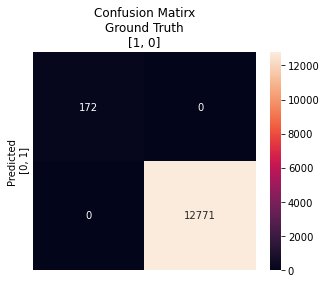

In [9]:
cm  = confusion_matrix(y_test, y_pred, labels=[1, 0])

print("confution matrix\n", cm)

plt.figure(figsize=(5,4))

ax = sns.heatmap(cm, annot=True, fmt='d', xticklabels=False, yticklabels=False)
ax.set_ylabel('Predicted\n [0, 1]')
ax.set_title('Confusion Matirx\nGround Truth\n[1, 0]')
None

In [105]:
print("Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)))
print("Precision: {:.2f}".format(precision_score(y_test, y_pred, labels=[1, 0])))
print("Recall: {:.2f}".format(recall_score(y_test, y_pred, labels=[1, 0])))
print("f1 score\n", f1_score(y_test, y_pred))

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
f1 score
 1.0
